In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
# loading the dataset to a Pandas DataFrame

credit_card_data = pd.read_csv(r"C:/Users/Alqama/Downloads/archive (2).zip")

In [8]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# checking missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# distribution of fair transaction and fraudulent transactions

credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
# This dataset is very unbalanced where label 1 represents fraud transactions and 0 label represents fair transaction

In [14]:
fair = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [15]:
print(fair.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


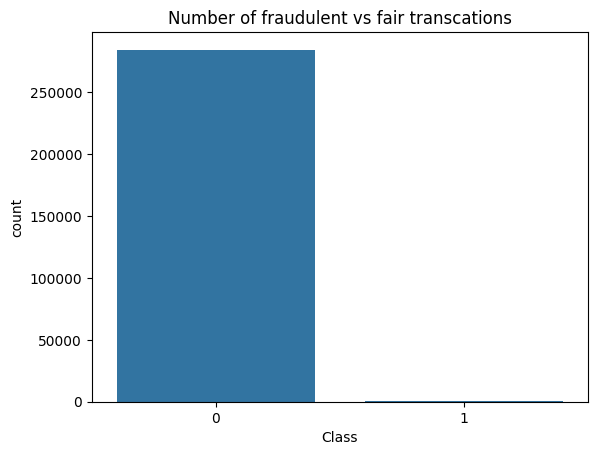

In [57]:
# Bar plot for the number of fraudulent vs fair transcations
sns.countplot(x='Class', data=credit_card_data)
plt.title('Number of fraudulent vs fair transcations')
plt.show()

In [58]:
# Creating fraudulent dataframe
data_fraud = credit_card_data[credit_card_data['Class'] == 1]
# Creating fair dataframe
data_non_fraud = credit_card_data[credit_card_data['Class'] == 0]

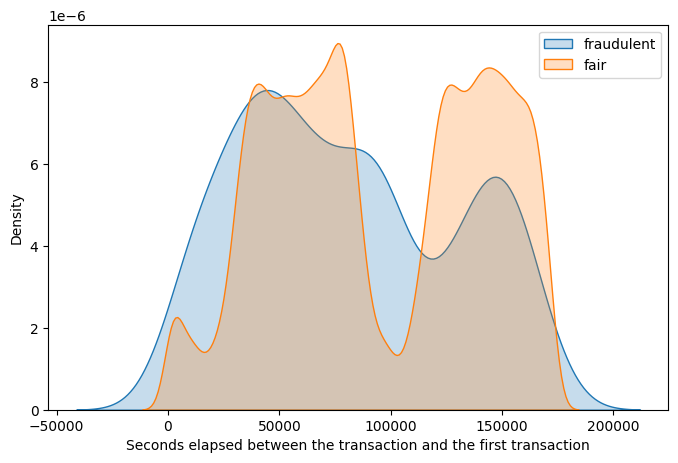

In [79]:
# Distribution plot with KDE
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(data_fraud['Time'], label='fraudulent', fill=True)
ax = sns.kdeplot(data_non_fraud['Time'], label='fair', fill=True)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.legend()
plt.show()


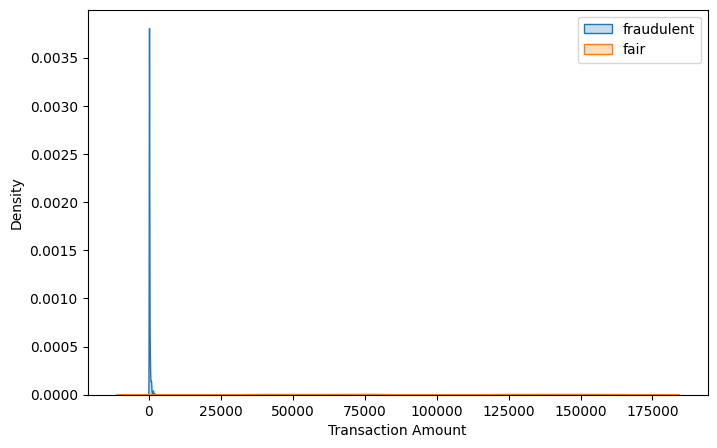

In [77]:
# Distribution plot of classes with amount
# KDE plot of classes with amount
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(data_fraud['Amount'], label='fraudulent', fill=True)
ax = sns.kdeplot(data_non_fraud['Time'], label='fair', fill=True)
ax.set(xlabel='Transaction Amount')
plt.legend()
plt.show()

In [ ]:
# Analysis
# We can see that the fraudulent transactions are mostly danced in the lower range of amount, whereas the non-fraudulent transactions are spread throughout low to high range of amount.

In [66]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [68]:
# Instantiate the Scaler
scaler = StandardScaler()

In [69]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,1.795667
37902,39161.0,-1.503208,0.488135,0.929931,-0.152836,0.622071,0.242274,0.528503,0.114394,0.191922,...,-0.100070,-0.333474,-0.364929,0.101790,-0.819770,0.244471,0.303412,0.295206,0.170142,-0.307315
74342,55529.0,-3.891383,-3.202678,-0.550307,1.257264,0.032704,-0.151567,1.759605,0.576043,-1.026412,...,2.049555,0.714252,-0.337498,1.613760,-0.529478,0.124815,-0.653739,-0.200582,-0.241118,2.638416
100526,67541.0,-0.708787,0.533013,0.635213,0.476484,1.931433,4.673552,-0.442462,1.132868,0.693644,...,0.075695,-0.426104,-0.747617,-0.040966,1.001714,-0.200138,-0.528274,-0.479793,-0.371061,-0.384903
96622,65854.0,-2.183873,0.648820,1.722106,1.772303,1.062141,0.806122,0.960531,-0.620281,0.296057,...,-0.434777,-0.508682,-0.228877,0.386929,-0.322092,0.022357,-0.308787,-1.022936,-0.375991,-0.425612


In [70]:
# Checking the Skewness
# Listing the columns
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

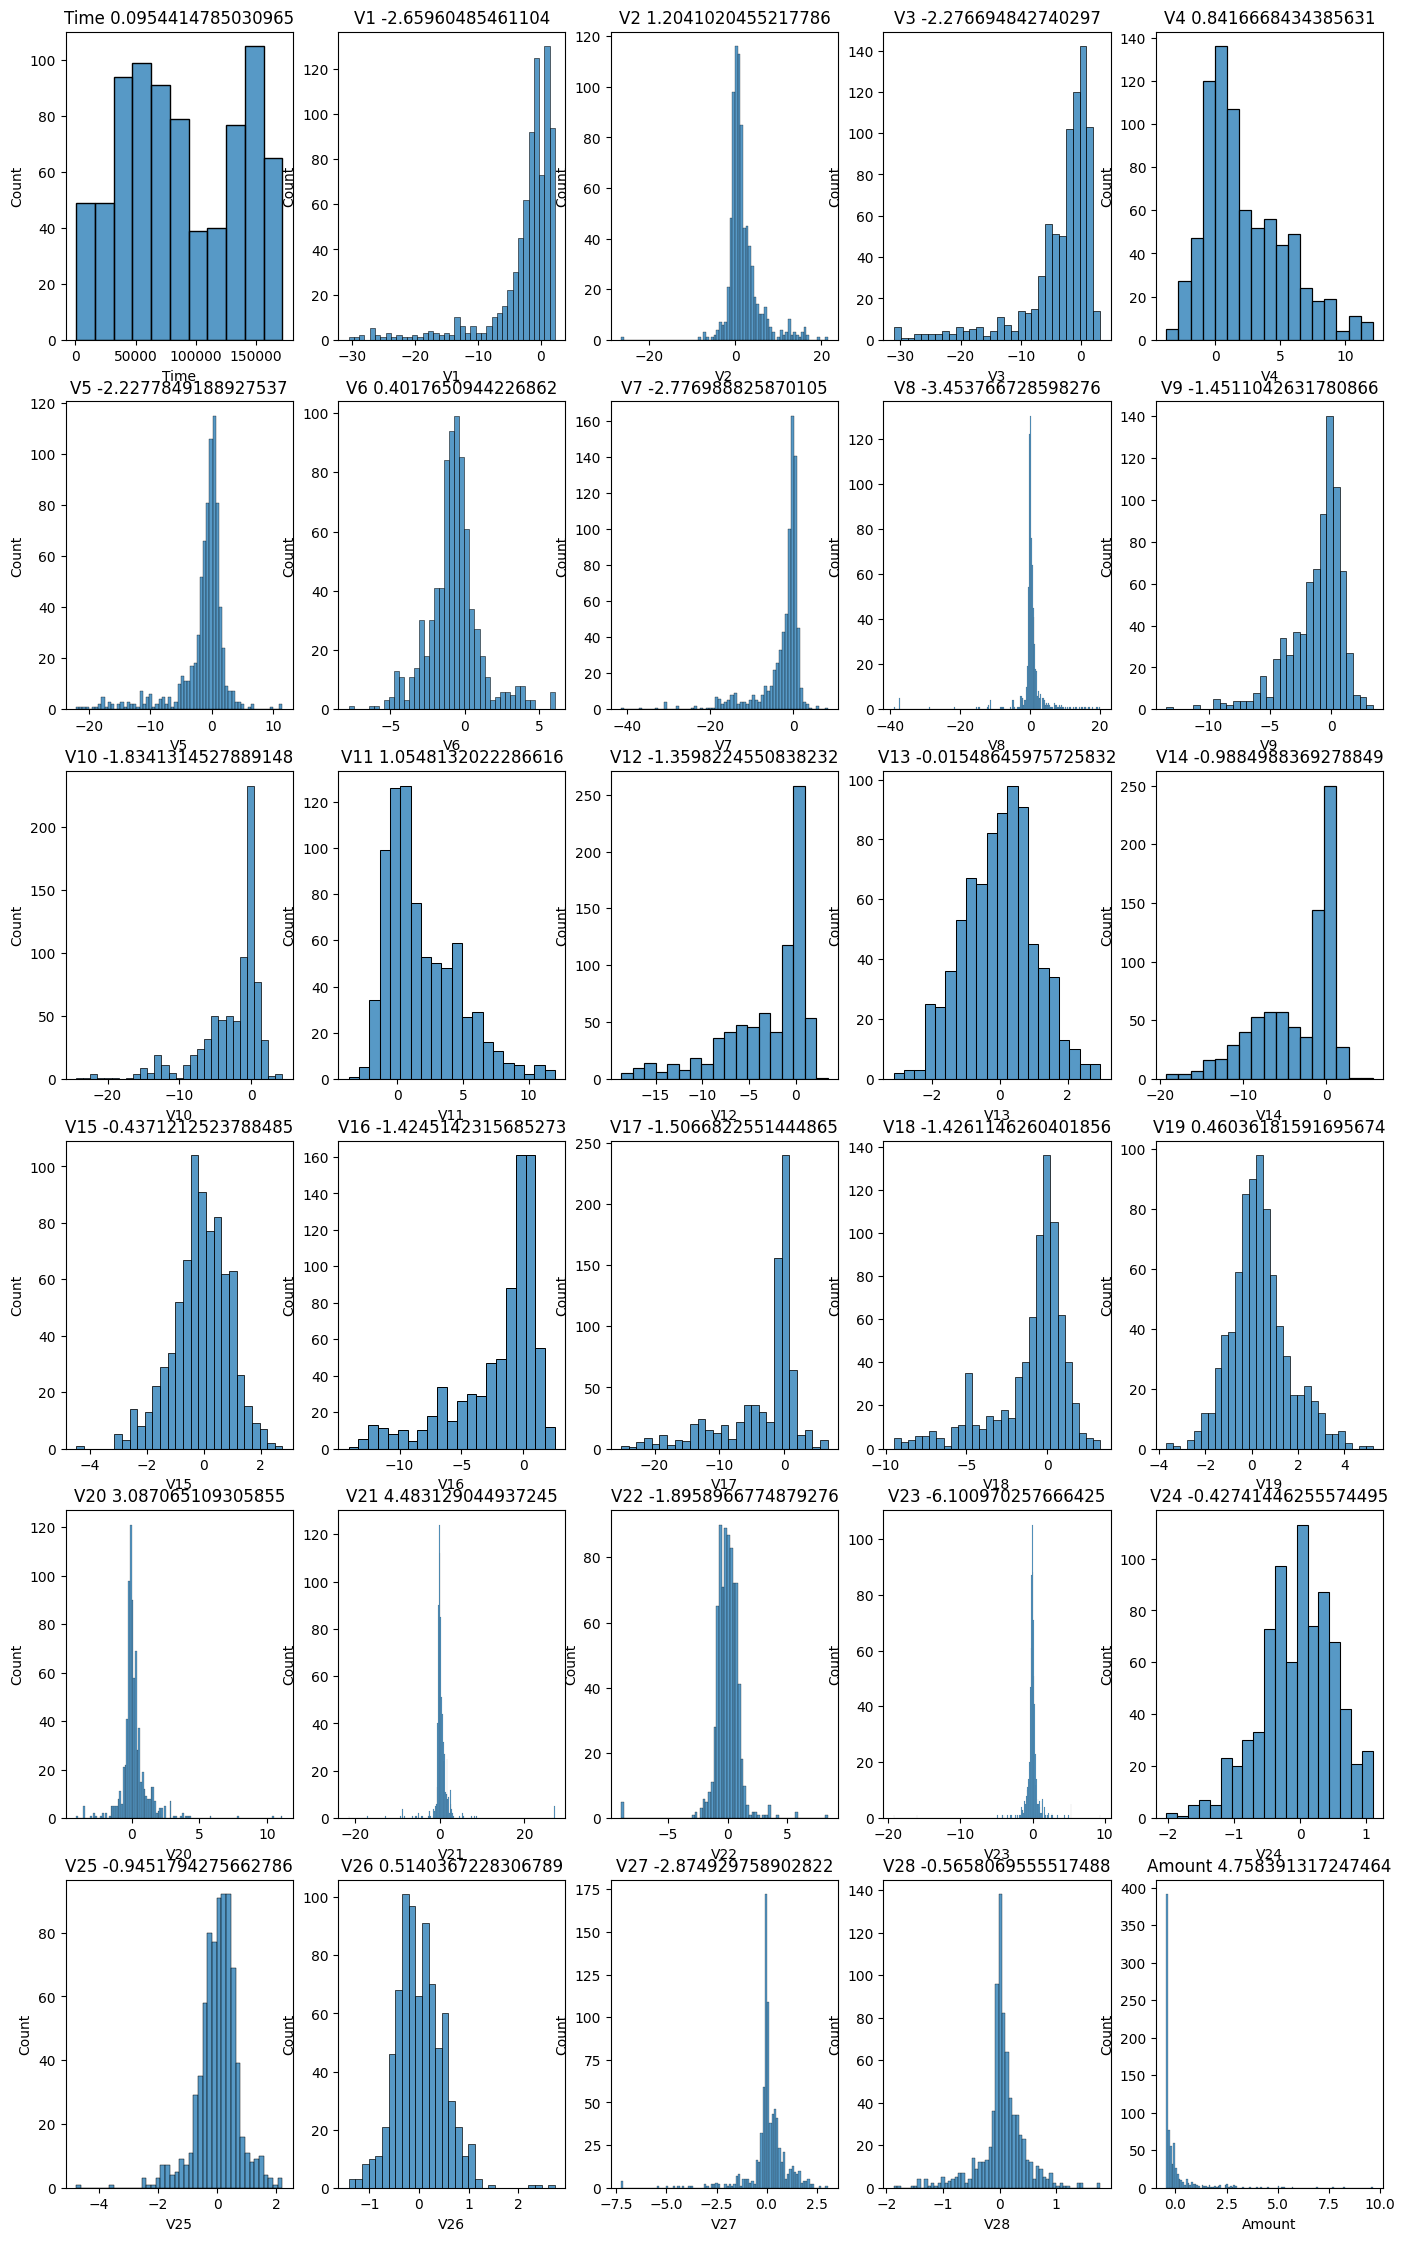

In [73]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.histplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [80]:
# Mitigate skweness with PowerTransformer
# Importing PowerTransformer

from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [81]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

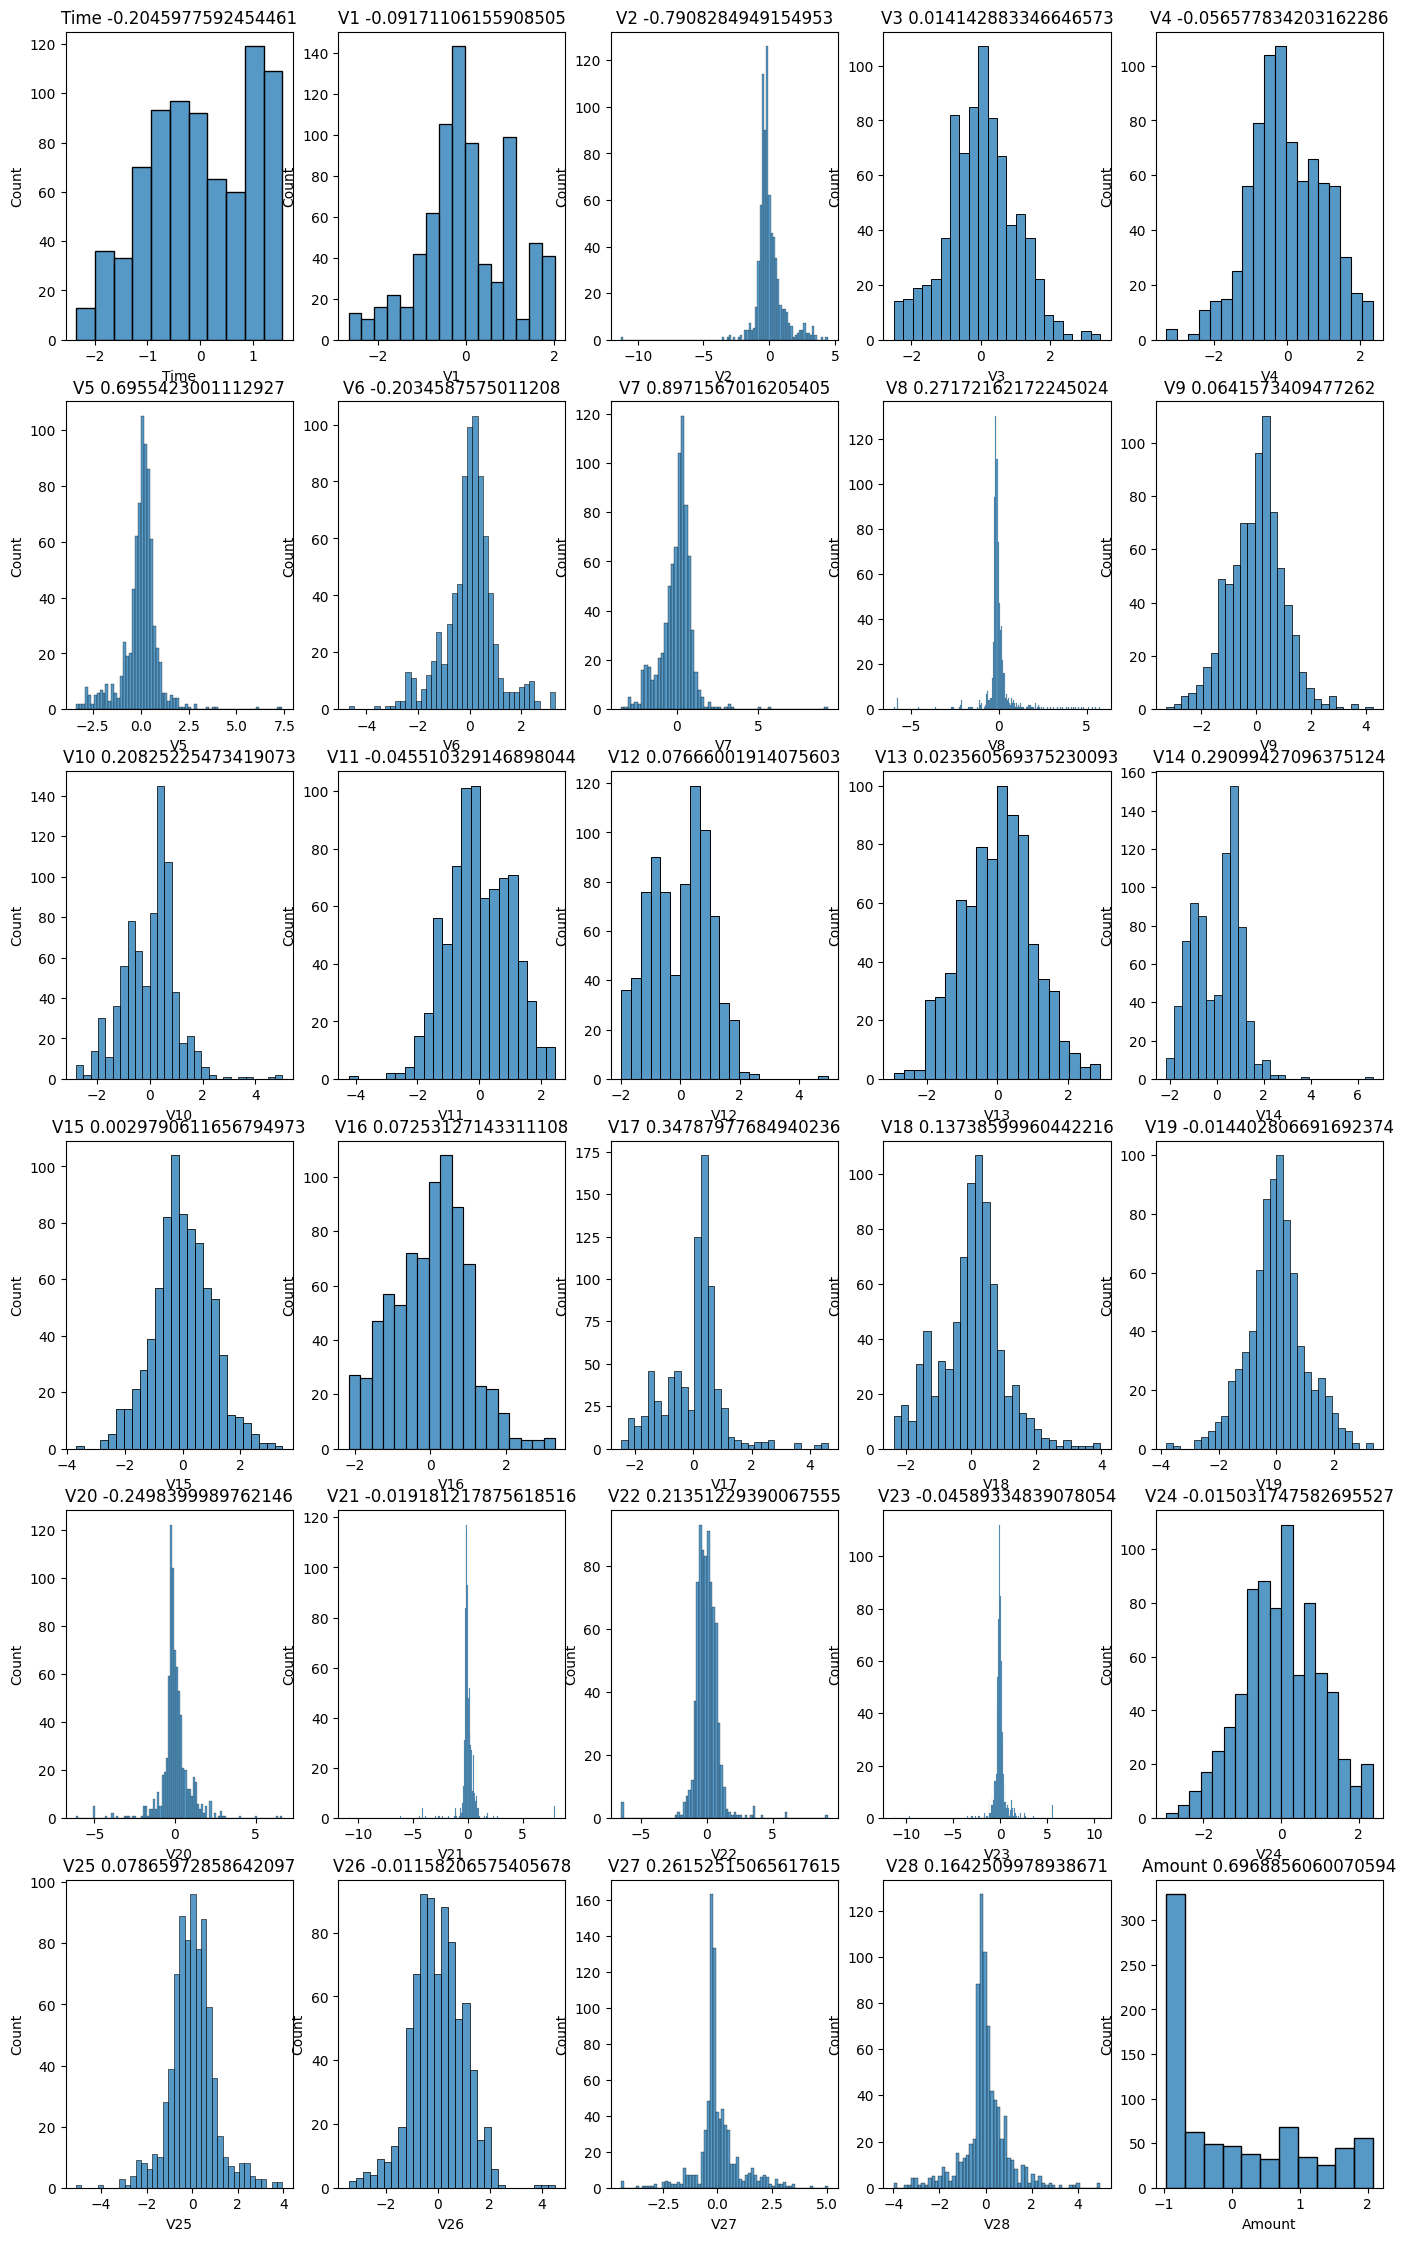

In [82]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.histplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [67]:
# statistical measures of the data
fair.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
# Comparing the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
# building a sample dataset containing a similar distribution of normal transactions and fraud transaction
# fraud transactions --> 492

In [20]:
fair_sample = fair.sample(n=492)

In [21]:
new_dataset = pd.concat([fair_sample, fraud], axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142905,85008.0,-0.341475,0.900211,0.331773,0.813116,3.184109,3.824945,0.221303,0.577237,-0.819912,...,0.030354,0.229812,-0.281175,0.901199,-0.396459,-0.097724,-0.266486,-0.266440,0.76,0
57554,47958.0,1.251410,-0.066170,0.329310,0.056416,-0.533267,-0.686199,-0.185649,-0.014419,0.382519,...,-0.097806,-0.295880,0.093332,0.092987,0.125843,0.963132,-0.073645,-0.002139,1.00,0
179068,123908.0,1.914021,-0.470450,-1.173757,0.332962,-0.277201,-0.898060,0.108448,-0.291116,1.113744,...,0.123751,0.555099,-0.028740,-0.012421,0.176523,0.194097,-0.034477,-0.051534,71.95,0
105982,69769.0,-0.690481,0.956326,1.277920,-0.217870,0.570859,-0.468451,0.641471,-0.163012,-0.421643,...,-0.180803,-0.636060,-0.148960,-0.452248,-0.279665,0.062144,-0.193669,0.142807,1.29,0
136496,81734.0,-1.422072,0.537346,0.974645,-2.598507,-0.617633,-0.627139,0.177823,0.573858,1.101008,...,-0.071467,-0.173719,-0.083881,0.233708,-0.100905,-0.387986,-0.024712,0.075522,33.50,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [24]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96350.077236,-0.101253,0.101900,-0.097435,0.070787,0.069841,-0.103697,0.040592,0.014360,-0.050705,...,0.011880,-0.002478,-0.027199,0.023226,0.013904,0.004064,-0.010065,-0.035469,-0.005908,83.172967
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
# splitting the data into Features & Targets 

In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
142905   85008.0 -0.341475  0.900211  0.331773  0.813116  3.184109  3.824945   
57554    47958.0  1.251410 -0.066170  0.329310  0.056416 -0.533267 -0.686199   
179068  123908.0  1.914021 -0.470450 -1.173757  0.332962 -0.277201 -0.898060   
105982   69769.0 -0.690481  0.956326  1.277920 -0.217870  0.570859 -0.468451   
136496   81734.0 -1.422072  0.537346  0.974645 -2.598507 -0.617633 -0.627139   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

142905    0
57554     0
179068    0
105982    0
136496    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [30]:
# split the data into Training and Testing data
# 4 variables are required in this process

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [33]:
#Model training

In [40]:
model = LogisticRegression()

In [41]:
# Training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
# Model evaluation
# Accuracy score

In [43]:
# accuracy analysis on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('accuracy on training data: ', training_data_accuracy)

accuracy on training data:  0.9479034307496823


In [110]:
# 1. Predicted probability
logistic_imb = LogisticRegression(C=0.01)
logistic_imb_model = logistic_imb.fit(X_train, Y_train)
Y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:, 1]

In [111]:
# Plot the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

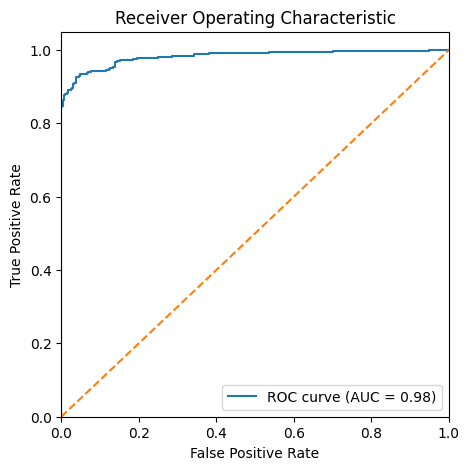

In [112]:
# Call the function to draw the ROC curve
draw_roc(Y_train, Y_train_pred_proba)

In [98]:
# Predicted probability
logistic_imb = LogisticRegression(C=0.01)
logistic_imb_model = logistic_imb.fit(X_train, Y_train)
Y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:, 1]

In [99]:
# Convert predicted probabilities to binary class labels
threshold = 0.5
Y_train_pred = (Y_train_pred_proba >= threshold).astype(int)

In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[391   2]
 [ 54 340]]


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.928843710292249
Sensitivity:- 0.8629441624365483
Specificity:- 0.9949109414758269


In [118]:
# ROC on the test set
# Predicted probability
Y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:, 1]

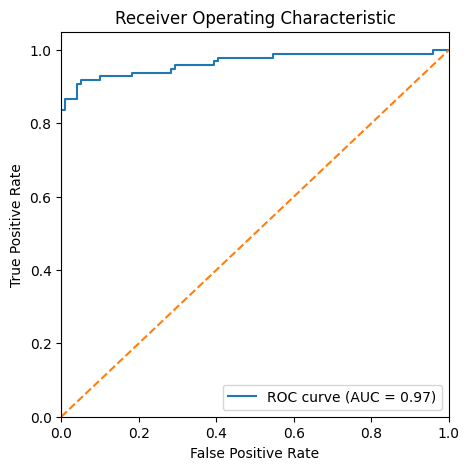

In [119]:
# Plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

In [45]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('accuracy on test data: ', test_data_accuracy)

accuracy on test data:  0.9289340101522843
